In [1]:
from utils import *

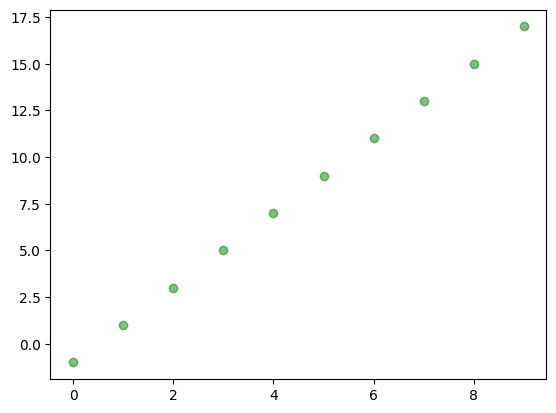

In [2]:
import matplotlib.pyplot as plt

X = range(10)
Y = [(2*xi - 1) for xi in X]
plt.plot(X, Y , 'go', alpha=0.5)

In [3]:
import torch
# dane 
x = torch.tensor(X).view(-1,1).to(torch.float)
y = torch.tensor(Y).view(-1,1).to(torch.float)

In [4]:
import torch

class LinearModel(torch.nn.Module):

    def __init__(self, inputSize: int, outputSize: int):
        super(LinearModel, self).__init__()
        
        self.layers = torch.nn.Sequential(
            torch.nn.Linear(inputSize, outputSize)
        )
    
    def forward(self, x):
        return self.layers(x)

In [5]:
model = LinearModel(1,1)
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [6]:
parameters(model)
warotosci_parametrow(model)

liczba trenowalnych parametrów: 2
weight: tensor([[0.6823]])
bias: tensor([-0.4586])


In [7]:
predict = model(x)
predicted = predict.detach().numpy()

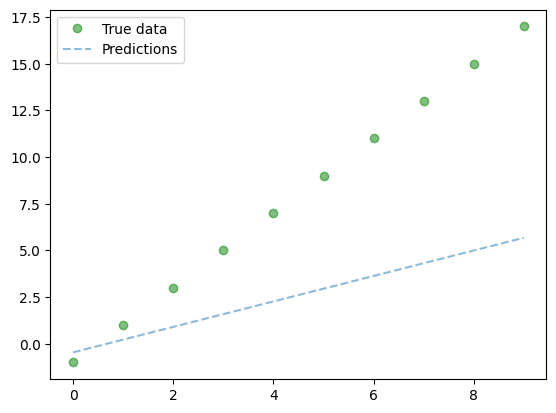

In [8]:
plt.clf()
plt.plot(x, y, 'go', label='True data', alpha=0.5)
plt.plot(x, predicted, '--', label='Predictions', alpha=0.5)
plt.legend(loc='best')
plt.show()

In [9]:
train(model, x,y, criterion=criterion, optimizer=optimizer)

epoch: 50, loss = 0.0893
epoch: 100, loss = 0.0507
epoch: 150, loss = 0.0288
epoch: 200, loss = 0.0163
epoch: 250, loss = 0.0093
epoch: 300, loss = 0.0053
epoch: 350, loss = 0.0030
epoch: 400, loss = 0.0017
epoch: 450, loss = 0.0010
epoch: 500, loss = 0.0005
epoch: 550, loss = 0.0003
epoch: 600, loss = 0.0002
epoch: 650, loss = 0.0001
epoch: 700, loss = 0.0001
epoch: 750, loss = 0.0000
epoch: 800, loss = 0.0000
epoch: 850, loss = 0.0000
epoch: 900, loss = 0.0000
epoch: 950, loss = 0.0000
epoch: 1000, loss = 0.0000


In [10]:
warotosci_parametrow(model)

weight: tensor([[1.9996]])
bias: tensor([-0.9975])


In [11]:
predict = model(x)
predicted = predict.detach().numpy()

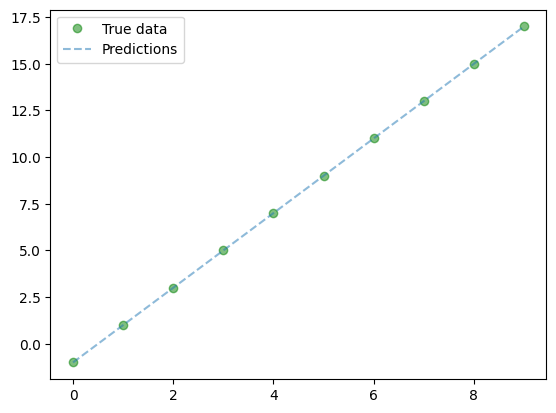

In [12]:
plt.clf()
plt.plot(x, y, 'go', label='True data', alpha=0.5)
plt.plot(x, predicted, '--', label='Predictions', alpha=0.5)
plt.legend(loc='best')
plt.show()

In [13]:
# Dane XOR
X = torch.tensor([[0,0], [0,1], [1,0], [1,1]], dtype=torch.float32)
Y = torch.tensor([[0], [1], [1], [0]], dtype=torch.float32)

In [14]:
import torch

class LinearClassifier(torch.nn.Module):

    def __init__(self, inputSize, outputSize):
        super(LinearClassifier, self).__init__()
        self.layers = torch.nn.Sequential(
            torch.nn.Linear(inputSize, outputSize),
            torch.nn.Sigmoid()

        )
    
    def forward(self, x):
        return self.layers(x)

In [15]:
xor_linear = LinearClassifier(2, 1)

criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(xor_linear.parameters(), lr=0.01)

In [16]:
parameters(xor_linear)
warotosci_parametrow(xor_linear)

liczba trenowalnych parametrów: 3
weight: tensor([[-0.6102,  0.1382]])
bias: tensor([0.0547])


In [17]:
train(xor_linear,X,Y,criterion=criterion, optimizer=optimizer)

epoch: 50, loss = 0.2569
epoch: 100, loss = 0.2565
epoch: 150, loss = 0.2561
epoch: 200, loss = 0.2558
epoch: 250, loss = 0.2555
epoch: 300, loss = 0.2552
epoch: 350, loss = 0.2550
epoch: 400, loss = 0.2547
epoch: 450, loss = 0.2545
epoch: 500, loss = 0.2544
epoch: 550, loss = 0.2542
epoch: 600, loss = 0.2540
epoch: 650, loss = 0.2539
epoch: 700, loss = 0.2538
epoch: 750, loss = 0.2536
epoch: 800, loss = 0.2535
epoch: 850, loss = 0.2534
epoch: 900, loss = 0.2533
epoch: 950, loss = 0.2532
epoch: 1000, loss = 0.2531


In [18]:
warotosci_parametrow(xor_linear)

weight: tensor([[-0.4269,  0.1411]])
bias: tensor([0.1216])


In [19]:
xor_linear.eval()
with torch.no_grad():
    y_predicted = xor_linear(X)  
    y_predicted_cls = y_predicted.round()
    acc = y_predicted_cls.eq(Y).sum() / float(y.shape[0])  # accuracy
    print(f'accuracy = {acc:.4f}')
for i,_ in enumerate(y_predicted_cls):

    print(f"predykcja dla wiersza 0:{y_predicted_cls[i]}, wartosc prawdziwa: {Y[i]}")

accuracy = 0.2000
predykcja dla wiersza 0:tensor([1.]), wartosc prawdziwa: tensor([0.])
predykcja dla wiersza 0:tensor([1.]), wartosc prawdziwa: tensor([1.])
predykcja dla wiersza 0:tensor([0.]), wartosc prawdziwa: tensor([1.])
predykcja dla wiersza 0:tensor([0.]), wartosc prawdziwa: tensor([0.])


In [20]:
import torch

class Classifier_XOR(torch.nn.Module):

    def __init__(self, inputSize, outputSize):
        super(Classifier_XOR, self).__init__()
        self.layers = torch.nn.Sequential(
            torch.nn.Linear(inputSize, 3),
            torch.nn.Tanh(),
            torch.nn.Linear(3,outputSize),
            torch.nn.Sigmoid()

        )
    
    def forward(self, x):
        return self.layers(x)

In [21]:
xor = Classifier_XOR(2, 1)

criterion = torch.nn.BCELoss()
optimizer = torch.optim.Adam(xor.parameters(), lr=0.01)

In [22]:
parameters(xor)

liczba trenowalnych parametrów: 13


In [23]:
train(xor,X,Y,criterion=criterion,optimizer=optimizer)

epoch: 50, loss = 0.6059
epoch: 100, loss = 0.3548
epoch: 150, loss = 0.1770
epoch: 200, loss = 0.1025
epoch: 250, loss = 0.0681
epoch: 300, loss = 0.0493
epoch: 350, loss = 0.0377
epoch: 400, loss = 0.0301
epoch: 450, loss = 0.0247
epoch: 500, loss = 0.0207
epoch: 550, loss = 0.0176
epoch: 600, loss = 0.0153
epoch: 650, loss = 0.0134
epoch: 700, loss = 0.0118
epoch: 750, loss = 0.0105
epoch: 800, loss = 0.0094
epoch: 850, loss = 0.0085
epoch: 900, loss = 0.0078
epoch: 950, loss = 0.0071
epoch: 1000, loss = 0.0065


In [24]:
xor(X),Y

(tensor([[0.0082],
         [0.9885],
         [0.9991],
         [0.0053]], grad_fn=<SigmoidBackward0>),
 tensor([[0.],
         [1.],
         [1.],
         [0.]]))